In [ ]:
#Descargando en un directorio temporal dentro de Google Colab el data set.

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip


import os
import zipfile

--2021-02-09 14:28:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   113MB/s    in 1.3s    

2021-02-09 14:28:22 (113 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
local_zip = '/tmp/horse-or-human.zip'
zip = zipfile.ZipFile(local_zip,'r')

In [ ]:
zip.extractall('/tmp/horse-or-human')
zip.close()

In [ ]:
#especificar directorios
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [ ]:
# ver el tamaño del dataset 
print("total imagenes entreno personas", len(os.listdir(train_human_dir)))
print("total imagenes entreno caballos", len(os.listdir(train_horse_dir)))

total imagenes entreno personas 527
total imagenes entreno caballos 500


In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])


['horse11-9.png', 'horse02-9.png', 'horse30-3.png', 'horse14-3.png', 'horse40-3.png', 'horse12-6.png', 'horse43-5.png', 'horse41-8.png', 'horse03-6.png', 'horse48-6.png']
['human11-23.png', 'human09-22.png', 'human05-28.png', 'human15-27.png', 'human17-22.png', 'human13-18.png', 'human12-07.png', 'human09-11.png', 'human17-09.png', 'human07-08.png']


In [ ]:
# impirmir imaenes del dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nfilas = 4
ncols = 4

index = 0

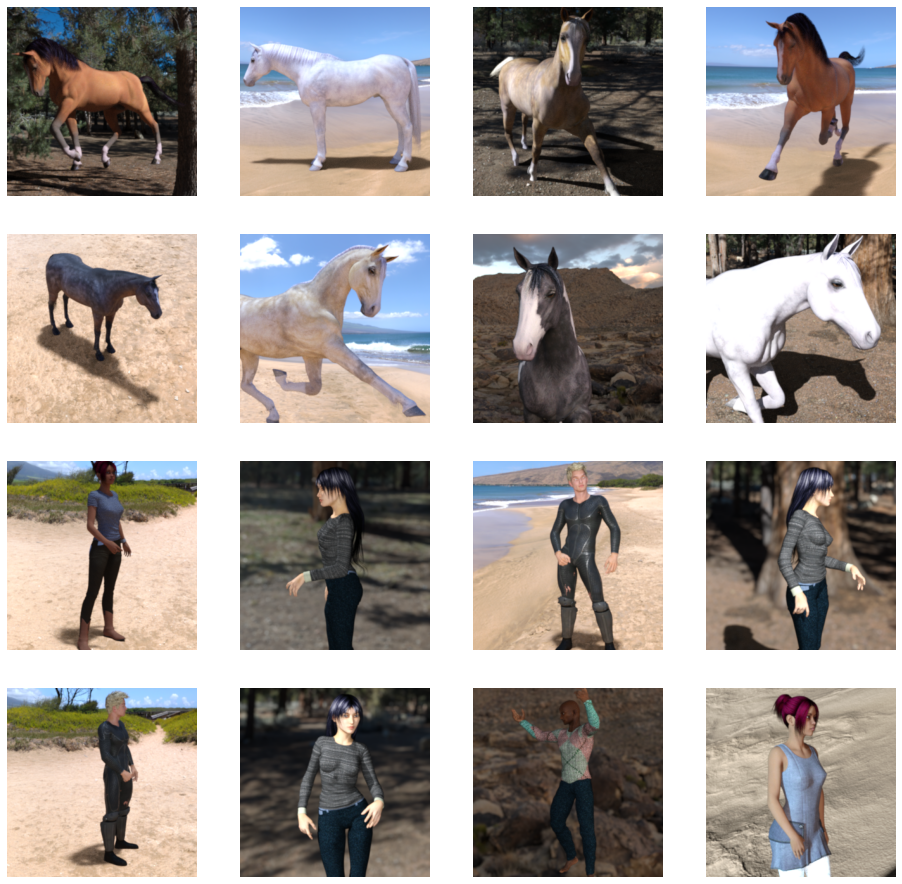

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4,nfilas*4)

index += 8

horse = [os.path.join(train_horse_dir,nombre_pic)
        for nombre_pic in train_horse_names[index-8:index]]
human = [os.path.join(train_human_dir,nombre_pic)
        for nombre_pic in train_human_names[index-8:index]]

for i,path in enumerate(horse+human):
  subplot = plt.subplot(nfilas,ncols,i+1)
  subplot.axis('off')
  img = mpimg.imread(path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf



In [ ]:
# crear modelo
modelo = tf.keras.Sequential([
                   tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                   tf.keras.layers.MaxPooling2D(2,2), 
                   tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                   tf.keras.layers.MaxPooling2D(2,2), 
                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                   tf.keras.layers.MaxPooling2D(2,2), 
                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                   tf.keras.layers.MaxPooling2D(2,2), 
                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                   tf.keras.layers.Flatten(),
                   tf.keras.layers.Dense(512,activation='relu'),
                   tf.keras.layers.Dense(1,activation='sigmoid')
                              
])

In [ ]:
#co(mpilar modelo
from tensorflow.keras.optimizers import RMSprop
modelo.compile(loss = 'binary_crossentropy',
               optimizer = RMSprop(lr=0.001),
               metrics=['accuracy'])# como el dataset no es desbalanceado podemos utilizar el accuracy

In [ ]:
#pre-procesar datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data = ImageDataGenerator(rescale=1/255)

train_generator = train_data.flow_from_directory(
    '/tmp/horse-or-human',
    target_size=(300,300),
    batch_size= 128,
    class_mode = 'binary')

Found 1027 images belonging to 2 classes.


In [ ]:
#entrar al modelo
modelo.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=1)

Epoch 1/15
8/8 [==============================] - 97s 12s/step - loss: 4.6456 - accuracy: 0.5690
Epoch 2/15
8/8 [==============================] - 75s 9s/step - loss: 0.7220 - accuracy: 0.5268
Epoch 3/15
8/8 [==============================] - 75s 9s/step - loss: 0.6471 - accuracy: 0.6559
Epoch 4/15
8/8 [==============================] - 75s 9s/step - loss: 0.9422 - accuracy: 0.7374
Epoch 5/15
8/8 [==============================] - 74s 9s/step - loss: 0.3416 - accuracy: 0.9094
Epoch 6/15
8/8 [==============================] - 75s 9s/step - loss: 0.1886 - accuracy: 0.9231
Epoch 7/15
8/8 [==============================] - 75s 9s/step - loss: 0.2478 - accuracy: 0.9149
Epoch 8/15
8/8 [==============================] - 74s 9s/step - loss: 0.8296 - accuracy: 0.7815
Epoch 9/15
8/8 [==============================] - 88s 11s/step - loss: 0.2467 - accuracy: 0.9110
Epoch 10/15
8/8 [==============================] - 85s 10s/step - loss: 0.1238 - accuracy: 0.9502
Epoch 11/15
8/8 [===================

In [ ]:
#probar el modelo
import numpy as np
from google.colab import files
from keras.preprocessing import image 

In [ ]:
imagen_nueva = files.upload()

for imagen in imagen_nueva.keys():
  path = '/content/'+imagen
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)

  imagenes = np.vstack([x])
  clases = modelo.predict(imagenes, batch_size=10)
  print(clases[0])
  if clases[0]>0.5:
    print(imagen + "es un humano")
  else:
    print(imagen + "es un caballo")

Saving pexels-free-nature-stock-9582.jpg to pexels-free-nature-stock-9582.jpg
[0.]
pexels-free-nature-stock-9582.jpges un caballo
